# Signal processing for visualization
* After reaading h5 files: Velocity (m/s) data 

In [1]:
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

## 1) Read velocity files for real and selected stations 

In [3]:
filename = '/Users/elifo/Desktop/2HZ_LosAlamos_ichunk_0.h5'

sep = '_'
NT = 6000
dt_output = 5e-3

In [4]:
# read hdf5 file into df
sta_coords = pd.read_hdf(filename, key='Stations')

In [5]:
%%time 

# read signal per component
ichunk = 0 # remove this!
data_xyz = []
for compo in ['X', 'Y', 'Z']:
    print ('Component: ', compo)
    df = pd.read_hdf(filename, key='V'+sep+compo)
    data = df.values
    NSTA_chunk = int(data.shape[0]/NT)
    data_xyz.append(data.reshape(NSTA_chunk, NT))
    print()
##
print('Station number in this chunk: ', NSTA_chunk)
print('*')

Component:  X

Component:  Y

Component:  Z

Station number in this chunk:  10000
*
CPU times: user 806 ms, sys: 3.29 s, total: 4.1 s
Wall time: 4.53 s


## Quick look at big array stations

In [6]:
sta_coords[0:15]  # big array

,Station,net,x,y,z
0,ACSM,EL,498494.600000,532877.900000,2042.684059
1,AMS,EL,501206.200000,531028.800000,1969.745468
2,BMSE,EL,497744.300000,543787.700000,2200.000000
3,ATE,EL,497744.300000,543787.700000,2152.000000
4,CDAB,EL,479540.966639,546778.780963,3081.414655
5,LOSL,EL,500000.900000,535096.600000,1999.000000
6,LSAR,EL,492475.400000,539722.600000,2291.493850
7,NYLA,EL,496089.300000,543418.400000,2202.417182
8,PER,EL,475591.170875,531627.104167,2798.242588
9,PFM,EL,495031.500000,535098.000000,2186.872913


<IPython.core.display.Javascript object>


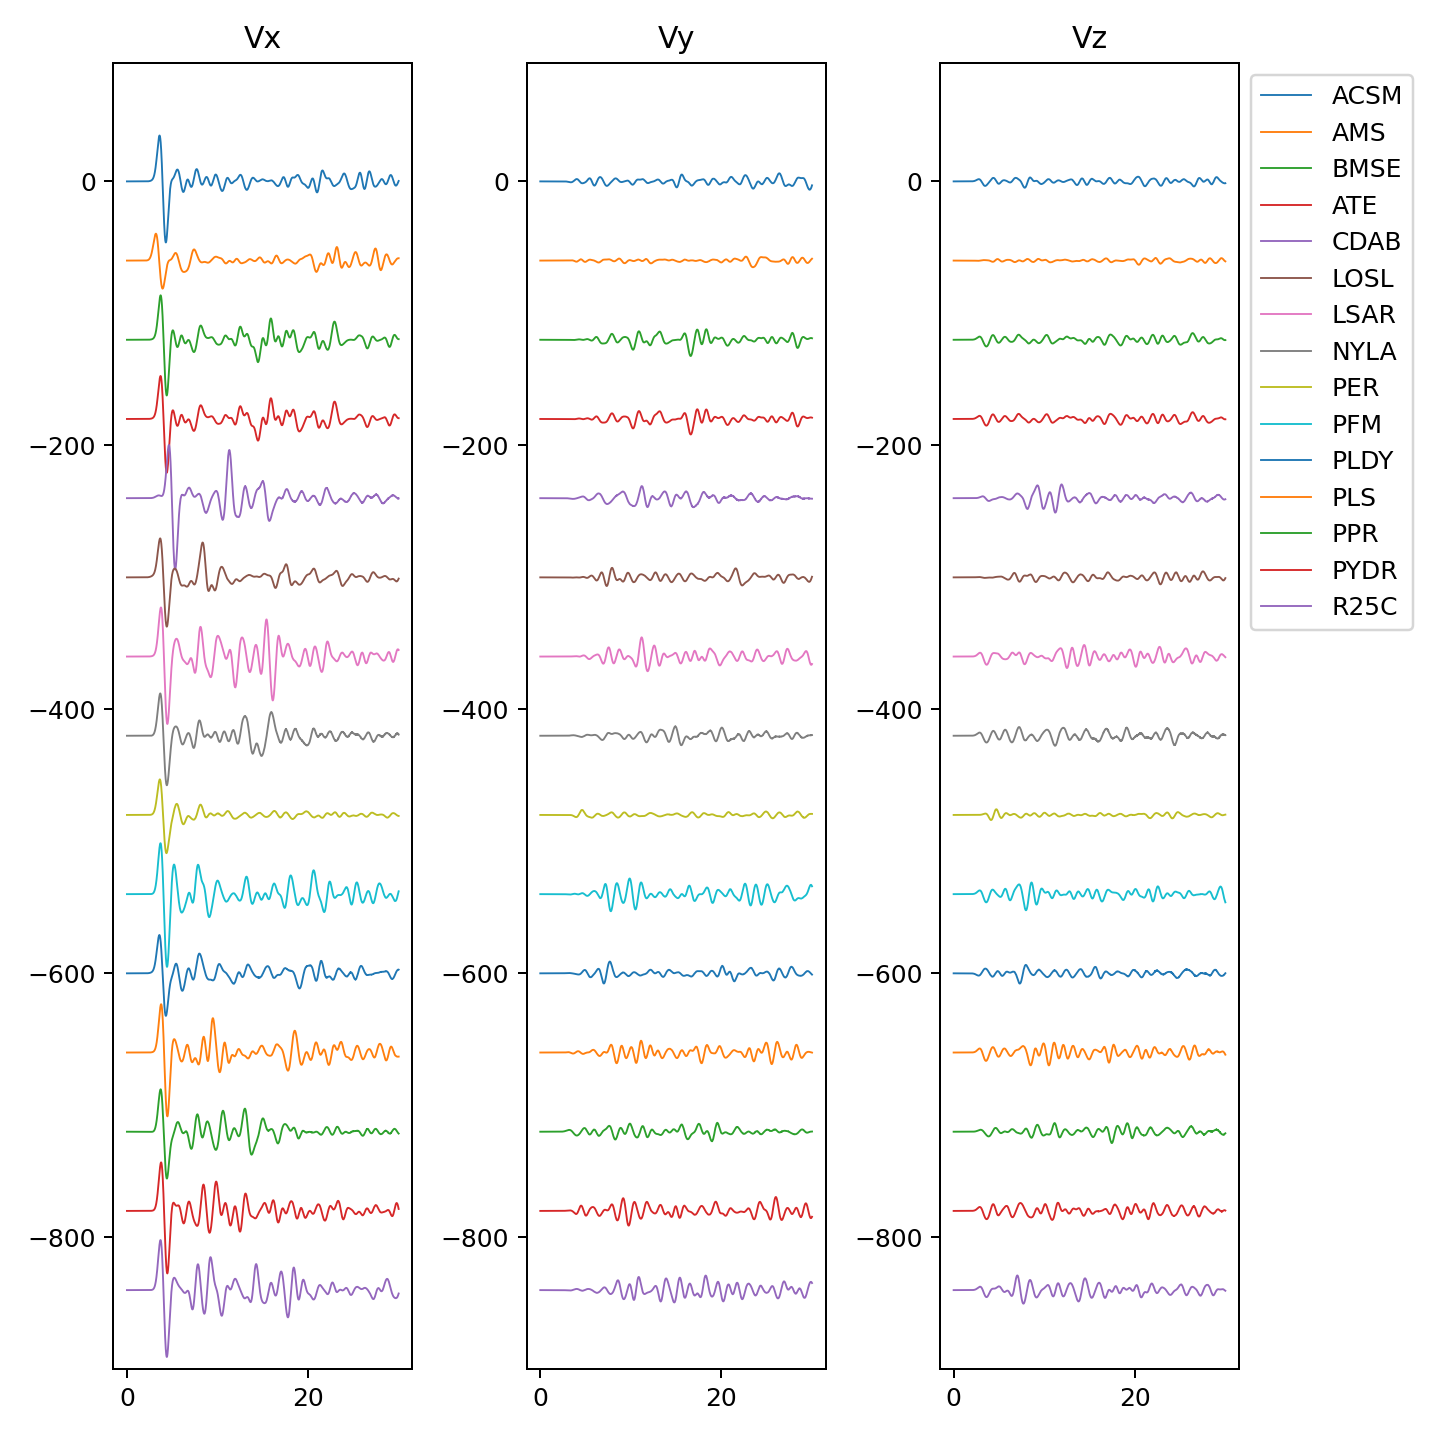

In [12]:
# quick check LARGE NETWORK
offset = 60
ylims= [-15*offset, 1.5*offset]

time = np.arange(NT)*dt_output
fig = plt.figure(figsize=(8, 8))

plt.subplot(131)
plt.ylim(ylims[0], ylims[1])
plt.title('Vx')
for ista in range(0,15):
    plt.plot(time, data_xyz[0][ista,:]-ista*offset,lw=0.75, label=sta_coords['Station'][ista])
#
plt.subplot(132)
plt.ylim(ylims[0], ylims[1])
plt.title('Vy')
for ista in range(0,15):
    plt.plot(time, data_xyz[1][ista,:]-ista*offset,lw=0.75, label=sta_coords['Station'][ista])
#

plt.subplot(133)
plt.ylim(ylims[0], ylims[1])
plt.title('Vz')
for ista in range(0,15):
    plt.plot(time, data_xyz[2][ista,:]-ista*offset,lw=0.75, label=sta_coords['Station'][ista])
#



plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

<IPython.core.display.Javascript object>


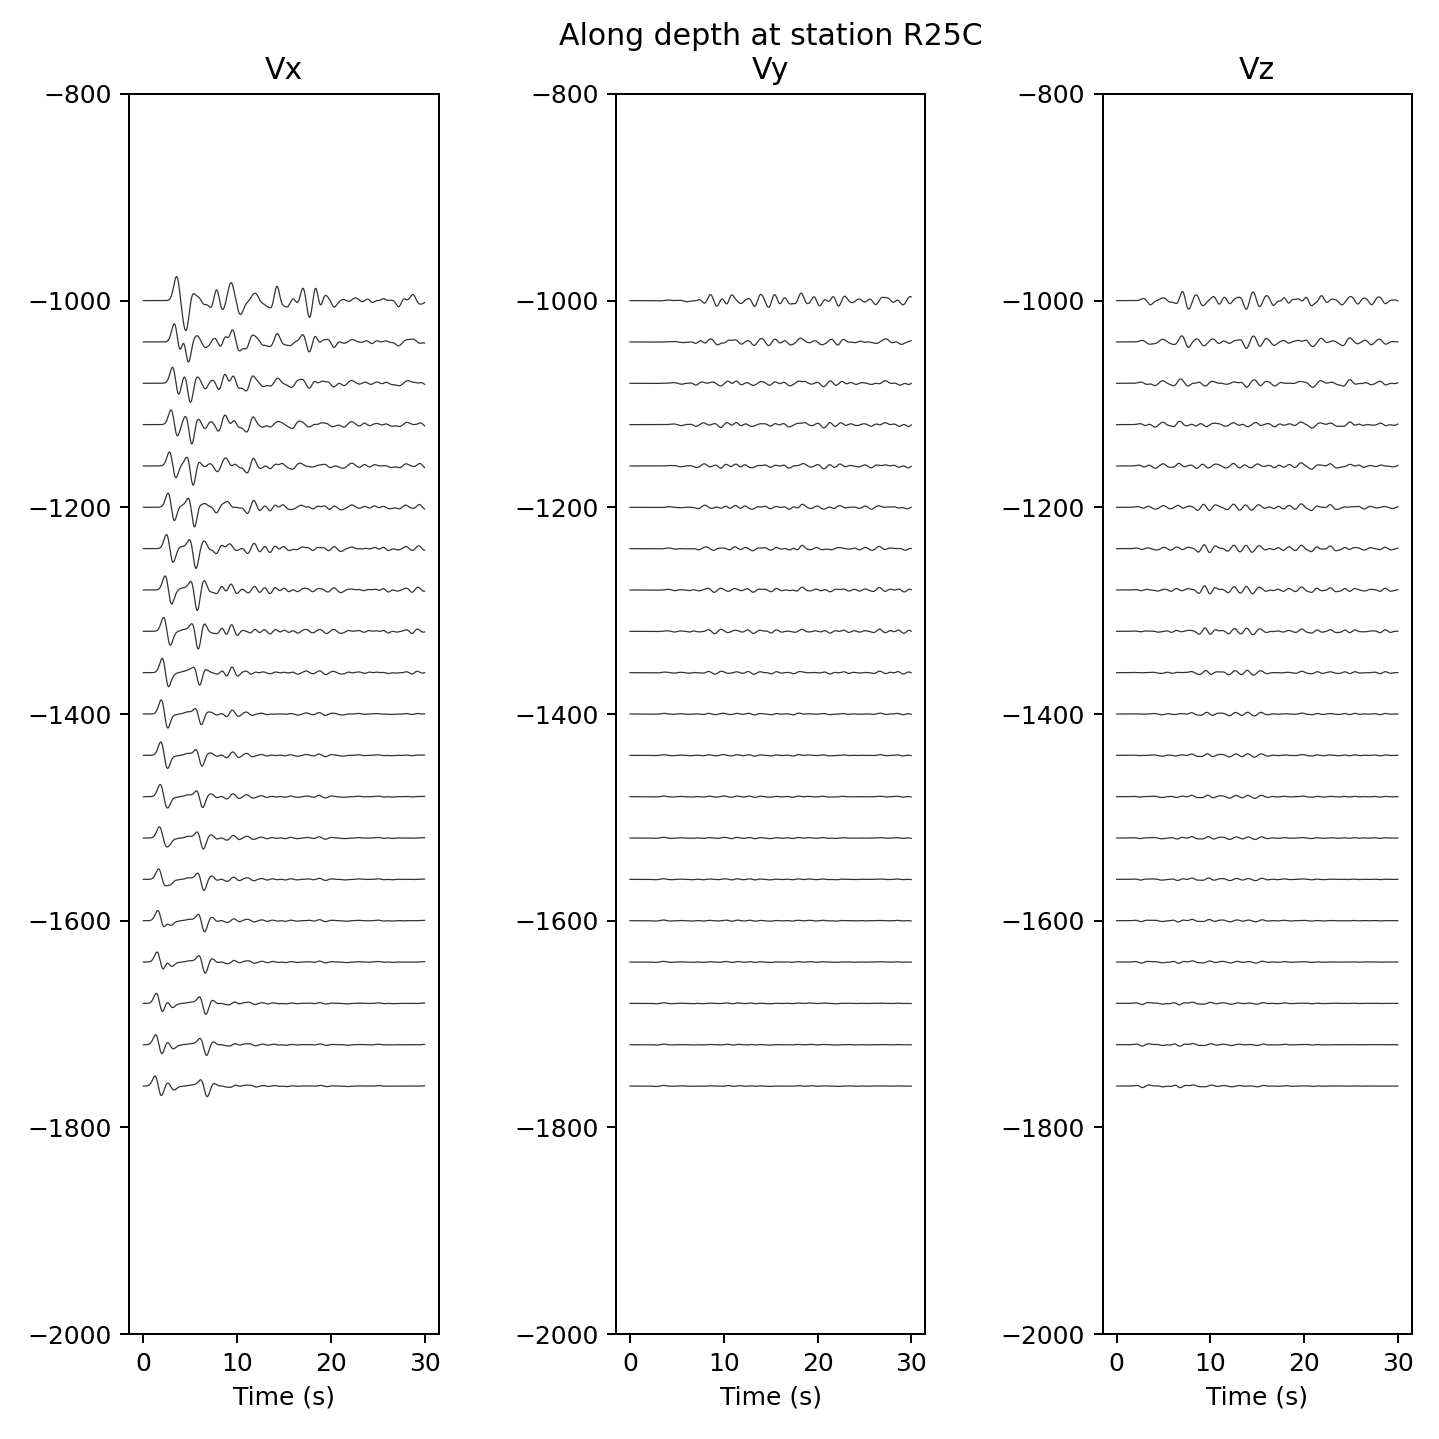

In [13]:
# quick check 
offset = 40
ylims = [-(45+5)*offset, (-25+5)*offset]

time = np.arange(NT)*dt_output
fig = plt.figure(figsize=(8, 8))
plt.subplot(131); plt.ylim(ylims[0], ylims[1])
plt.title('Vx')
for ista in range(25,45,1):
    plt.plot(time, data_xyz[0][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
plt.xlabel('Time (s)')
#
plt.subplot(132); plt.ylim(ylims[0], ylims[1])
plt.title('Along depth at station R25C'+ '\n'+'Vy')
for ista in range(25,45,1):
    plt.plot(time, data_xyz[1][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
plt.xlabel('Time (s)')
#   
plt.subplot(133); plt.ylim(ylims[0], ylims[1])
plt.title('Vz')
for ista in range(25,45,1):
    plt.plot(time, data_xyz[2][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
plt.xlabel('Time (s)')
#      
plt.tight_layout()

## Pick stations along PFM

<IPython.core.display.Javascript object>


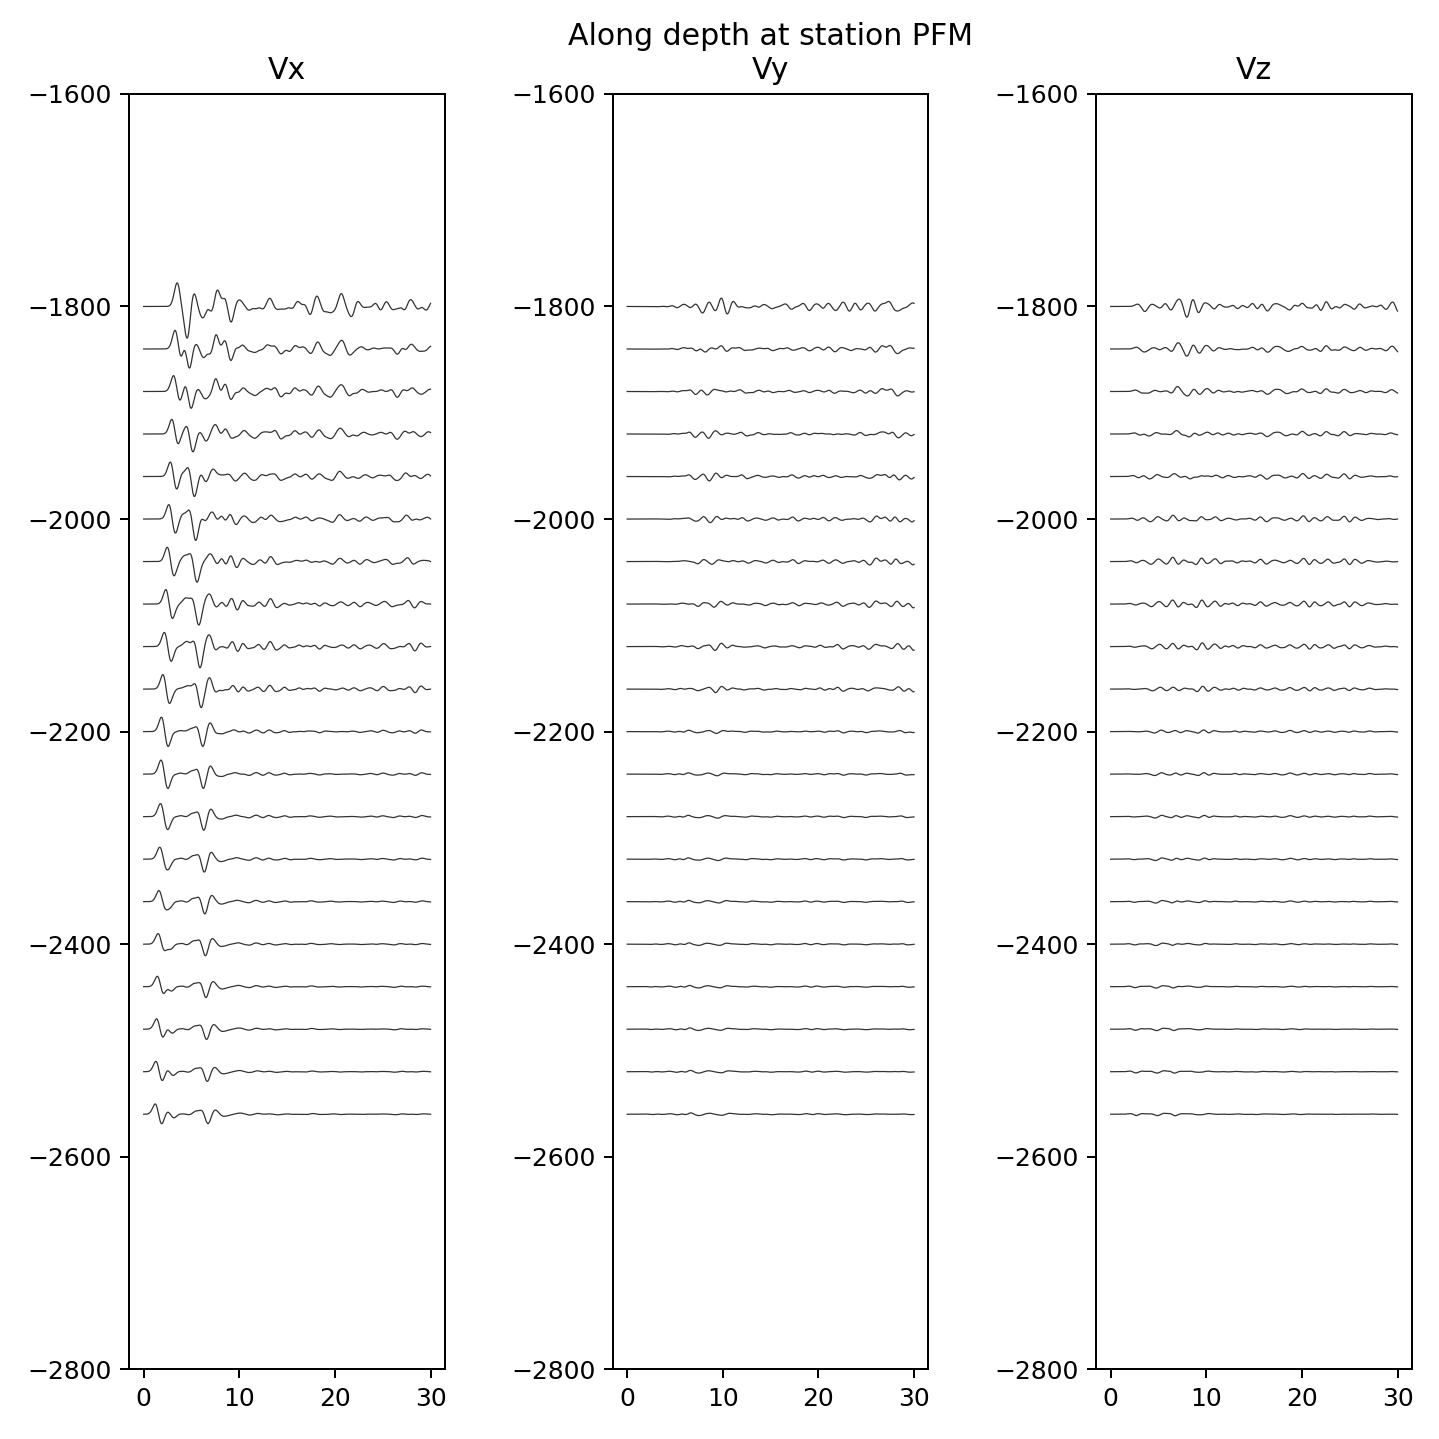

In [14]:
# quick check 
offset = 40
ylims = [-(65+5)*offset, (-45+5)*offset]


time = np.arange(NT)*dt_output
fig = plt.figure(figsize=(8, 8))
plt.subplot(131); plt.ylim(ylims[0], ylims[1])
plt.title('Vx')
for ista in range(45,65,1):
    plt.plot(time, data_xyz[0][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
#
plt.subplot(132); plt.ylim(ylims[0], ylims[1])
plt.title('Along depth at station PFM'+ '\n'+'Vy')
for ista in range(45,65,1):## Pick stations along R25C
    plt.plot(time, data_xyz[1][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
#   
plt.subplot(133); plt.ylim(ylims[0], ylims[1])
plt.title('Vz')
for ista in range(45,65,1):
    plt.plot(time, data_xyz[2][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
#      

plt.tight_layout()

## Pick stations along x ~ 505e3; y ~ 535e3	

<IPython.core.display.Javascript object>


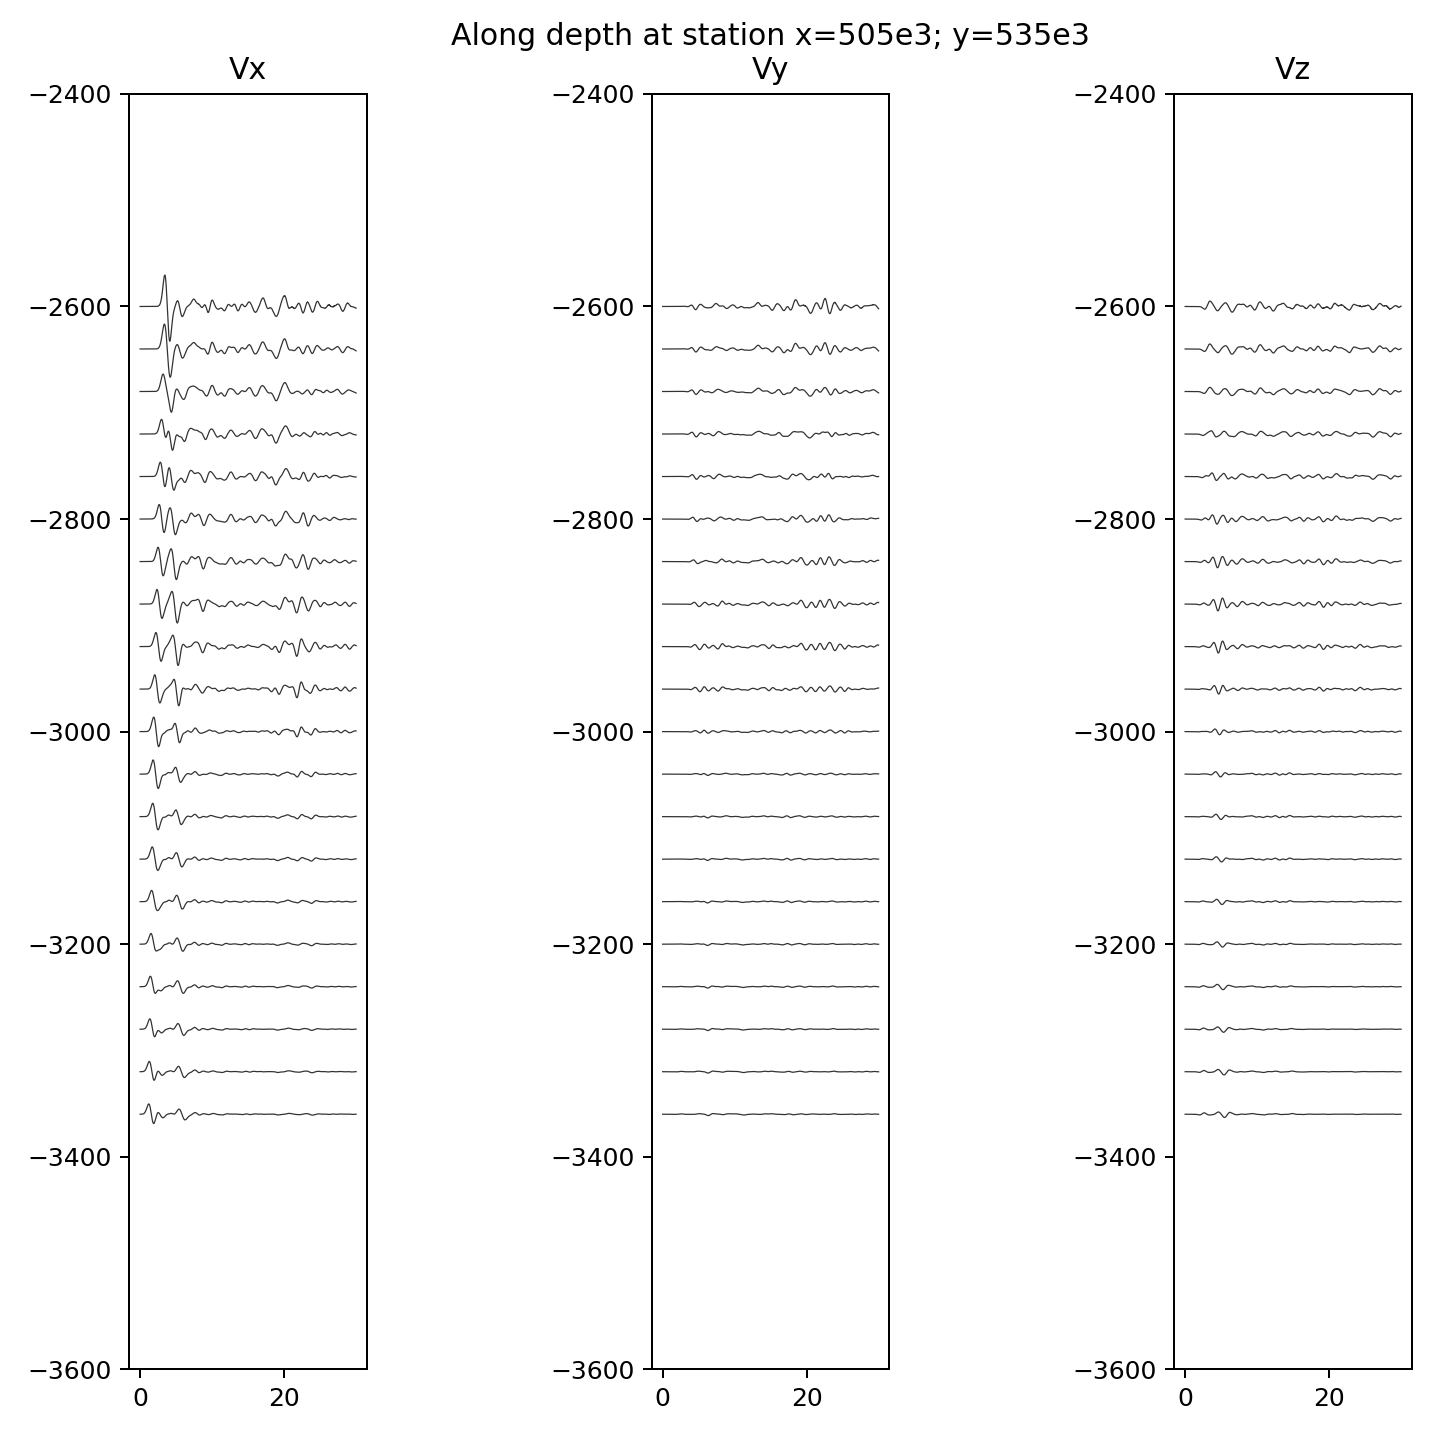

In [15]:
# quick check 
offset = 40
ylims = [-(85+5)*offset, (-65+5)*offset]

## Pick stations along PFM
time = np.arange(NT)*dt_output
fig = plt.figure(figsize=(8, 8))
plt.subplot(131); plt.ylim(ylims[0], ylims[1])
plt.title('Vx')
for ista in range(65,85,1):
    plt.plot(time, data_xyz[0][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
#
plt.subplot(132); plt.ylim(ylims[0], ylims[1])
plt.title('Along depth at station x=505e3; y=535e3'+ '\n'+'Vy')
for ista in range(65,85,1):
    plt.plot(time, data_xyz[1][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
#   
plt.subplot(133); plt.ylim(ylims[0], ylims[1])
plt.title('Vz')
for ista in range(65,85,1):
    plt.plot(time, data_xyz[2][ista,:]-ista*offset, 'k', alpha=0.8,lw=0.5)
#      

plt.tight_layout()

## Pick stations in small array

In [16]:
sta_coords[15:25]  # small array

,Station,net,x,y,z
15,S1,EL,498018.4,539061.600000,2086.000000
16,S2,EL,497933.4,539092.500000,2087.000000
17,S3,EL,497893.2,539111.400000,2102.301618
18,S4,EL,497870.5,539116.500000,2109.798361
19,S5,EL,497838.3,539129.640312,2122.994206
20,S6,EL,497745.2,539162.500000,2128.846352
21,S7,EL,497802.8,539033.100000,2089.000000
22,S8,EL,497821.7,539084.100000,2113.000000
23,S9,EL,497853.3,539173.200000,2111.116353
24,S10,EL,497884.3,539240.000000,2090.000000


<IPython.core.display.Javascript object>


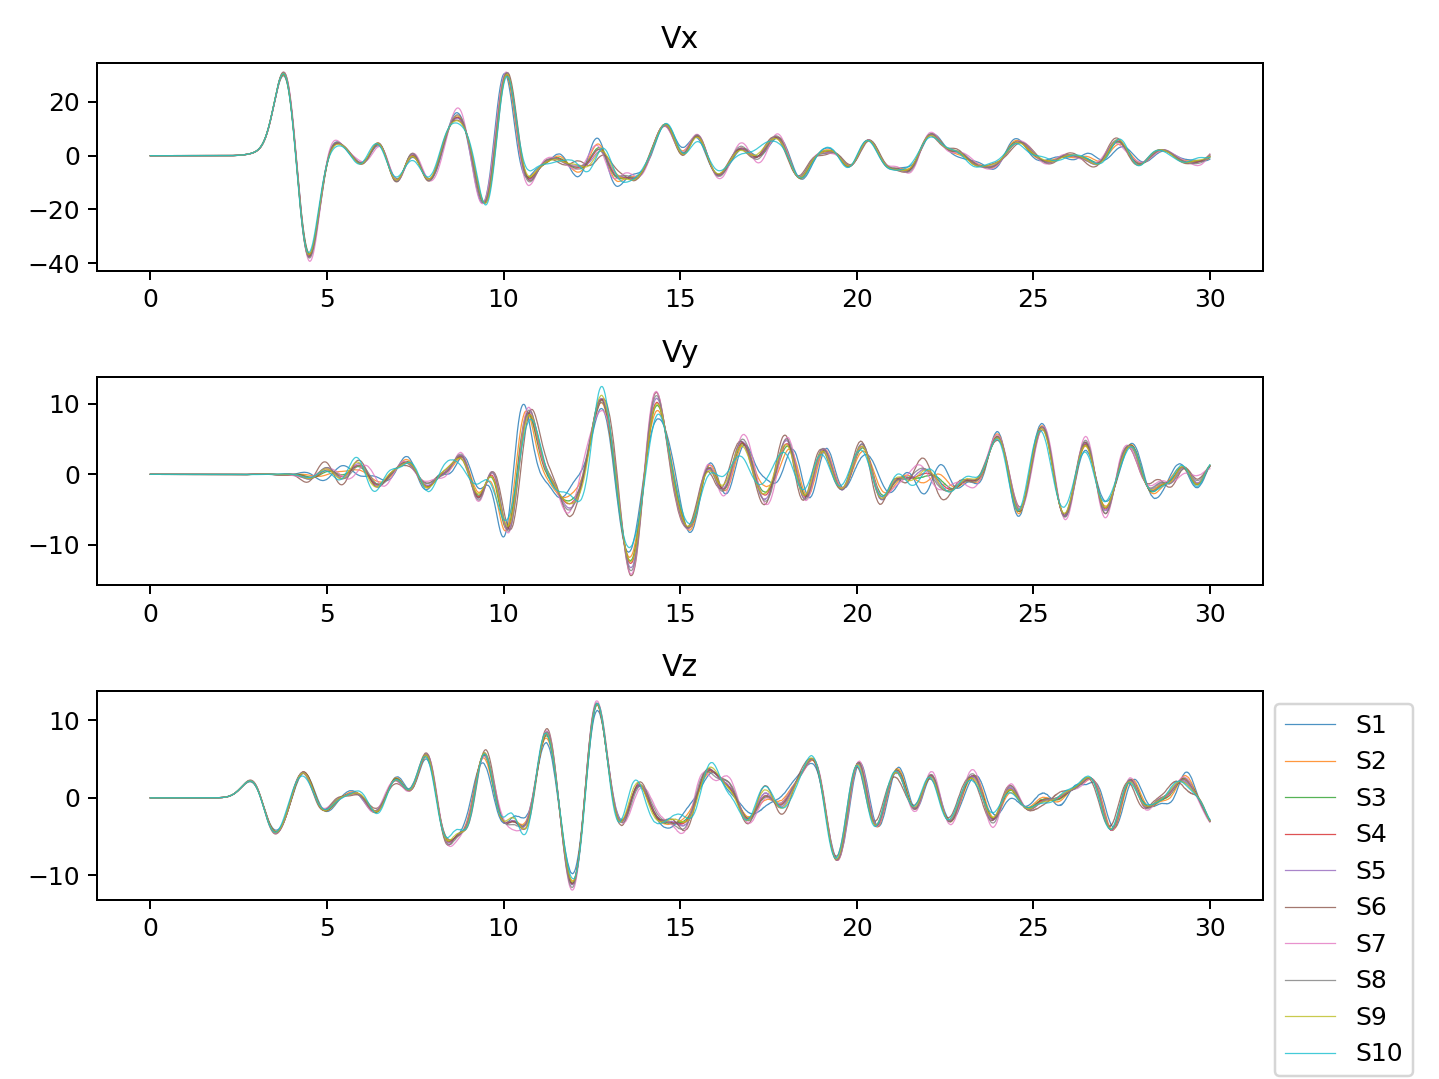

In [18]:
# quick check SMALL NETWORK 

time = np.arange(NT)*dt_output
fig = plt.figure(figsize=(8, 6))
plt.subplot(311)
plt.title('Vx')
for ista in range(15,25):
    plt.plot(time, data_xyz[0][ista,:], alpha=0.8,lw=0.5, label=sta_coords['Station'][ista])
#
plt.subplot(312)
plt.title('Vy')
for ista in range(15,25):
    plt.plot(time, data_xyz[1][ista,:], alpha=0.8,lw=0.5, label=sta_coords['Station'][ista])
#

plt.subplot(313)
plt.title('Vz')
for ista in range(15,25):
    plt.plot(time, data_xyz[2][ista,:], alpha=0.8,lw=0.5, label=sta_coords['Station'][ista])
#


plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

In [ ]:
#fin